In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from tqdm import trange
# import ipdb
import matplotlib.pyplot as plt
import matplotlib.colors as colors


print(torch.__version__)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

1.4.0
cuda:0


In [3]:
_batch_size = 1

data_train = datasets.MNIST("./data", train=True, download = True, transform=transforms.ToTensor())
data_test = datasets.MNIST("./data", train=False, download = True, transform=transforms.ToTensor())

# idx_3, idx_7 = data_train.targets == 3, data_train.targets == 7
# idx_train = idx_3 | idx_7

# idx_3, idx_7 = data_test.targets == 3, data_test.targets == 7
# idx_test = idx_3 | idx_7

# data_train.targets = data_train.targets[idx_train]
# data_train.data = data_train.data[idx_train]
# data_test.targets = data_test.targets[idx_test]
# data_test.data = data_test.data[idx_test]

# # label 0: 3, label 1: 7
# data_train.targets = ((data_train.targets - 3)/4).float()
# data_test.targets = ((data_test.targets - 3)/4).float()


train_loader = torch.utils.data.DataLoader(data_train, batch_size = _batch_size)
test_loader = torch.utils.data.DataLoader(data_test, batch_size = _batch_size)

In [4]:
total_x_fft = np.zeros((28,28), dtype = np.complex128)
total_3_fft = np.zeros((28,28), dtype = np.complex128)
num_3 = 0
total_7_fft = np.zeros((28,28), dtype = np.complex128)
num_7 = 0

with trange(len(train_loader)) as t:
    for x,y in train_loader:
        a = np.fft.fftshift(np.fft.fft2(x.squeeze().detach().cpu().numpy()))
        total_x_fft += a
        
        if y.item() == 3:
            total_3_fft += a
            num_3 += 1
        elif y.item() == 7:
            total_7_fft += a
            num_7 += 1
        t.update()

mean_x_fft = total_x_fft/len(train_loader)
mean_3_fft = total_3_fft/num_3
mean_7_fft = total_7_fft/num_7

100%|██████████| 60000/60000 [00:30<00:00, 1975.00it/s]


/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/h/ama/.conda/envs/general/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import k

Text(0.5, 1.0, "Log Mean Fourier Spectrum \n of MNIST (all 7's)")

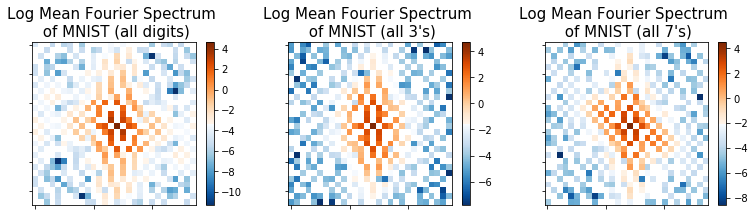

In [10]:
# blue: positive, red: negative
top = plt.cm.get_cmap('Blues', 128)
bottom = plt.cm.get_cmap('Oranges_r', 128)

newcolors = np.vstack((top(np.linspace(1, 0, 128)),
                       bottom(np.linspace(1, 0, 128))))
newcmp = colors.ListedColormap(newcolors, name='OrangeBlue')


fig_test = plt.figure(figsize = [13,3])
gs = fig_test.add_gridspec(1,3)
p1 = fig_test.add_subplot(gs[0,0]).imshow(np.log(np.real(mean_x_fft)), cmap = newcmp)
fig_test.colorbar(p1)
fig_test.add_subplot(gs[0,0]).set_yticklabels([])
fig_test.add_subplot(gs[0,0]).set_xticklabels([])
# fig_test.add_subplot(gs[0,0]).set_title('Log Mean Fourier Spectrum \n of MNIST:' + r'Log $\frac{1}{n}$ \Sigma F{x_{i}')
fig_test.add_subplot(gs[0,0]).set_title('Log Mean Fourier Spectrum \n of MNIST (all digits)', fontsize=15)


p2 = fig_test.add_subplot(gs[0,1]).imshow(np.log(np.real(mean_3_fft)), cmap = newcmp)
fig_test.colorbar(p2)
fig_test.add_subplot(gs[0,1]).set_yticklabels([])
fig_test.add_subplot(gs[0,1]).set_xticklabels([])
fig_test.add_subplot(gs[0,1]).set_title('Log Mean Fourier Spectrum \n of MNIST (all 3\'s)', fontsize=15)


p3 = fig_test.add_subplot(gs[0,2]).imshow(np.log(np.real(mean_7_fft)), cmap = newcmp)
fig_test.colorbar(p3)
fig_test.add_subplot(gs[0,2]).set_yticklabels([])
fig_test.add_subplot(gs[0,2]).set_xticklabels([])
fig_test.add_subplot(gs[0,2]).set_title('Log Mean Fourier Spectrum \n of MNIST (all 7\'s)', fontsize=15)
